In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

# aplpy 

# Abrir el archivo FITS
fits_file = "ngc6946Ha_I_Ha_ksb2004.fits"  # Reemplaza con el nombre de tu archivo
hdul = fits.open(fits_file)

# Ver información general del FITS
hdul.info()

# Datos de la imagen
data = hdul[0].data

# Cerrar FITS
hdul.close()

Filename: ngc6946Ha_I_Ha_ksb2004.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (2900, 2900)   float32   


In [18]:
print("Forma de los datos:", data.shape)
print("Máximo:", np.nanmax(data), "Mínimo:", np.nanmin(data))

Forma de los datos: (2900, 2900)
Máximo: 20.868612 Mínimo: -0.012544661


In [ ]:
# Calcular la suma total de los valores de los píxeles
suma_total = np.nansum(data)


#norm=LogNorm(vmin=0.01, vmax=1)
 
#De ERIC FAUSTINO JIMENEZ ANDRADE a Todos (20 feb 2025, 10:27 a. m.)
#nan_to_num
#zoros_to_num

# Calcular el factor de escalamiento
SFR_total = 500  # Msun/yr
factor_escala = SFR_total / suma_total

# Aplicar el factor de escalamiento
data_escalada = data * factor_escala

# Verificar que la suma ahora es 500 Msun/yr
print("Nueva suma total de píxeles:", np.nansum(data_escalada))

Nueva suma total de píxeles: 500.00027


In [22]:
# Encontrar el píxel más brillante en la imagen original
pixel_max = np.nanmax(data)

# Calcular el SFR del píxel más brillante
SFR_max_pixel = pixel_max * factor_escala

print("SFR del píxel más brillante:", SFR_max_pixel, "Msun/yr")


SFR del píxel más brillante: 0.14237236679988358 Msun/yr


AttributeError: AxesImage.set() got an unexpected keyword argument 'scale'

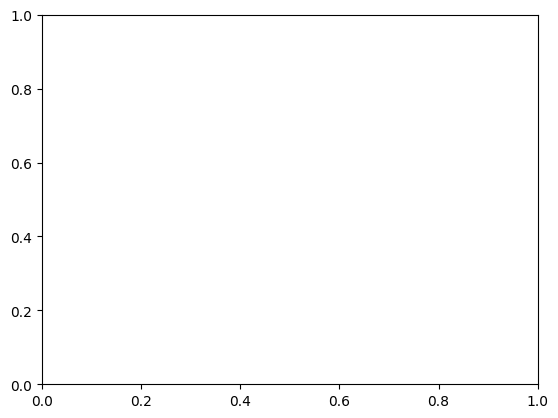

In [ ]:
# Mostrar la imagen escalada
plt.imshow(data_escalada, cmap="gray", origin="lower")
plt.colorbar(label="SFR (Msun/yr)")
plt.title("Imagen FITS Escalada a SFR")
plt.show()

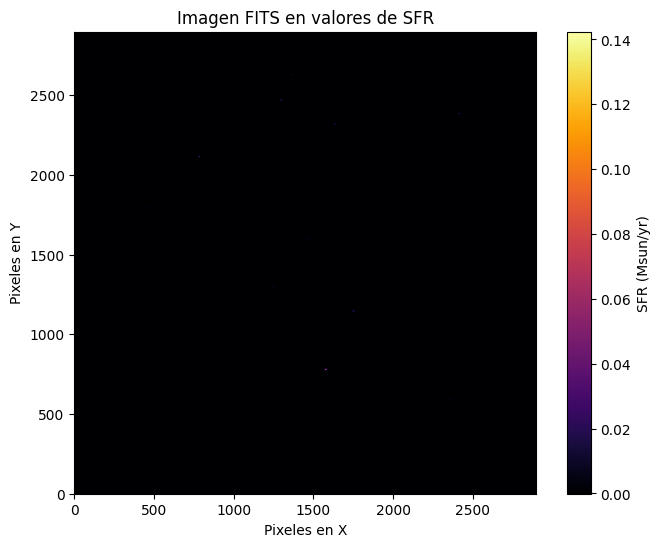

In [ ]:
# Graficar la imagen con los valores escalados a SFR
plt.figure(figsize=(8, 6))
plt.imshow(data_escalada, cmap="inferno", origin="lower")
plt.colorbar(label="SFR (Msun/yr)")
plt.title("Imagen FITS en valores de SFR")
plt.xlabel("Pixeles en X")
plt.ylabel("Pixeles en Y")
plt.show()

